In [1]:
import matplotlib.pyplot as plt
from project2.util.graphviz import GraphViz

In [2]:
graph_viz = GraphViz()
graph_fp = '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt'

graph_viz.loadGraphFromFile(graph_fp)

In [3]:
from project2.graph import Graph, Point
from project2.search import Searcher, SearchNode

You have asked for a/an 'DFS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Your start node is '(U, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)



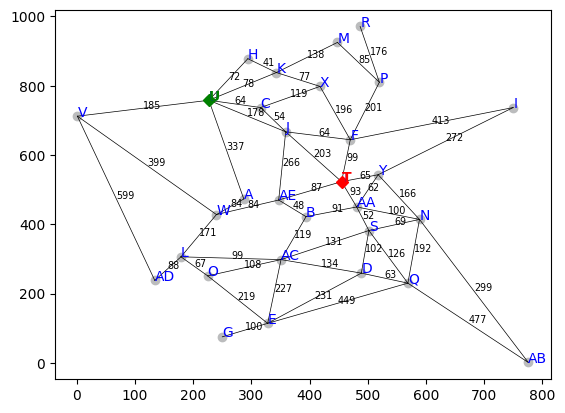

In [4]:
graph = Graph(graph_fp)
searcher = Searcher(graph, 'DFS', 'U', 'T', 0, graph_viz=graph_viz)


In [5]:
print(f'FRONTIER: {searcher.frontier}')

FRONTIER: [(U, 0.00)]


[(A, 337.00), (C, 64.00), (H, 72.00), (J, 178.00), (K, 78.00), (V, 185.00)]


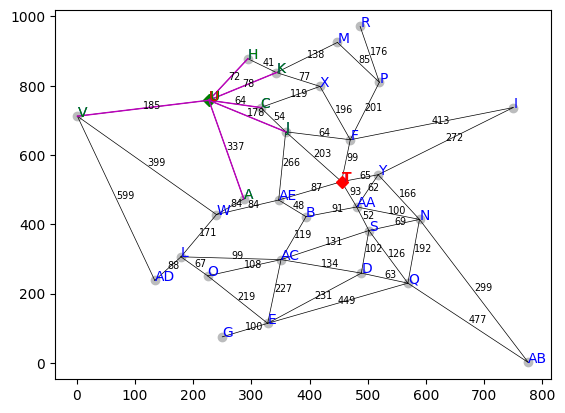

In [6]:
searcher.current_node = searcher.start
children = searcher._expand_node()
print(children)
searcher._plotCurrent(children)

In [7]:
searcher._add_children(children)
print(searcher.frontier)

[(A, 337.00), (C, 64.00), (H, 72.00), (J, 178.00), (K, 78.00), (V, 185.00), (U, 0.00)]


In [8]:
searcher = Searcher(graph, 'BFS', 'U', 'T', 0)

searcher.current_node = searcher.start
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)


You have asked for a/an 'BFS' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Your start node is '(U, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(U, 0.00), (A, 337.00), (C, 64.00), (H, 72.00), (J, 178.00), (K, 78.00), (V, 185.00)]


In [9]:
searcher = Searcher(graph, 'BEST', 'U', 'T', 0)

searcher.current_node = searcher.frontier.pop()
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)


You have asked for a/an 'BEST' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Your start node is '(U, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(J, 173.07), (A, 175.28), (C, 255.18), (K, 334.32), (H, 389.80), (V, 491.77)]


In [10]:
K = SearchNode('K', heuristic_cost=500)
C = SearchNode('C', heuristic_cost=91)
J = SearchNode('J', heuristic_cost=10)

searcher._add_children([K, C, J])
print(searcher.frontier)

[(J, 10.00), (C, 91.00), (A, 175.28), (H, 389.80), (V, 491.77), (K, 500.00)]


In [11]:
searcher = searcher = Searcher(graph, 'A*', 'V', 'T', 0, heuristic='SLD')
searcher.current_node = searcher.frontier.pop()
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)

You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Heuristic 'SLD' will be used.
Your start node is '(V, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(U, 512.43), (W, 634.05), (AD, 1028.26)]


In [12]:
searcher = searcher = Searcher(graph, 'A*', 'AC', 'T', 0, heuristic='SLD')
searcher.current_node = searcher.frontier.pop()
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)

You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Heuristic 'SLD' will be used.
Your start node is '(AC, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(B, 236.99), (S, 279.63), (D, 400.18), (L, 450.09), (O, 464.21), (E, 655.26)]


In [13]:
searcher = searcher = Searcher(graph, 'A*', 'J', 'T', 0, heuristic='SLD')
searcher.current_node = searcher.frontier.pop()
children = searcher._expand_node()
searcher._add_children(children)
print(searcher.frontier)

You have asked for a/an 'A*' type search to be run on the graph specified by the file '/home/anthony/src/school/cs570/cs570/project2/graphs/30node.txt.'
Heuristic 'SLD' will be used.
Your start node is '(J, 0.00)' and your goal(s) are '[(T, 0.00)]'.
Up to '0' expansions will be done in search of the goal (0 means no limit)

[(F, 185.93), (T, 203.00), (C, 309.18), (AE, 386.30), (U, 505.43)]


In [ ]:
# Load 300 node
# Select random start
# Select random end != start
# Run 15 iterations (Of who knows what algo, BFS?)
# Select and save new random end
# VIZ THIS
# Run with all 5 algos on old and new end